<a href="https://colab.research.google.com/github/rafiafsan/Machine-Learning-Models/blob/main/Rain_Prediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
df = pd.read_csv("/content/weatherAUS.csv")

In [25]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [26]:
df = df.drop(['Sunshine'], axis=1)

In [27]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [28]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566
WindDir3pm,4228


In [29]:
df.isnull().sum()/df.shape[0]*100

,0
Date,0.000000
Location,0.000000
MinTemp,1.020899
MaxTemp,0.866905
Rainfall,2.241853
Evaporation,43.166506
WindGustDir,7.098859
WindGustSpeed,7.055548
WindDir9am,7.263853
WindDir3pm,2.906641


In [30]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors=10)

In [32]:
for i in df.select_dtypes(include='number').columns:
  df[i] = impute.fit_transform(df[[i]])

In [33]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
WindGustDir,10326
WindGustSpeed,0
WindDir9am,10566
WindDir3pm,4228


In [39]:
df = df.drop(['RainToday'], axis=1)

In [40]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No


In [38]:
df1=df

In [41]:
# Encode the target variable (diagnosis)
label_encoder = LabelEncoder()
df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])

In [42]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.468232,44.00000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0
1,2008-12-02,Albury,7.4,25.100000,0.0,5.468232,44.00000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0
2,2008-12-03,Albury,12.9,25.700000,0.0,5.468232,46.00000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0
3,2008-12-04,Albury,9.2,28.000000,0.0,5.468232,24.00000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0
4,2008-12-05,Albury,17.5,32.300000,1.0,5.468232,41.00000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.468232,31.00000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.468232,22.00000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0
145457,2017-06-23,Uluru,5.4,26.900000,0.0,5.468232,37.00000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0
145458,2017-06-24,Uluru,7.8,27.000000,0.0,5.468232,28.00000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0


In [43]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [45]:
y

,RainTomorrow
0,0
1,0
2,0
3,0
4,0
...,...
145455,0
145456,0
145457,0
145458,0


In [49]:
X = X.drop(['Location'], axis=1)

In [50]:
X_scaled = scaler.fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [52]:
# Build the ANN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8031 - loss: 0.4416 - val_accuracy: 0.8202 - val_loss: 0.4093
Epoch 2/50
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8238 - loss: 0.3953 - val_accuracy: 0.8169 - val_loss: 0.3948
Epoch 3/50
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8238 - loss: 0.3828 - val_accuracy: 0.8151 - val_loss: 0.3857
Epoch 4/50
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8218 - loss: 0.3733 - val_accuracy: 0.8169 - val_loss: 0.3771
Epoch 5/50
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8201 - loss: 0.3667 - val_accuracy: 0.8172 - val_loss: 0.3550
Epoch 6/50
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8257 - loss: 0.3398 - val_accuracy: 0.8137 - val_loss: 0.2936
Epoch 7/50
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8233 - loss: 0.2631 - val_accuracy: 0.8168 - val_loss: 0.0874
Epoch 8/50
3637/3637 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8197 - loss: -5

In [55]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8118 - loss: -2538.4749
Test Accuracy: 81.30%


In [56]:
import matplotlib.pyplot as plt

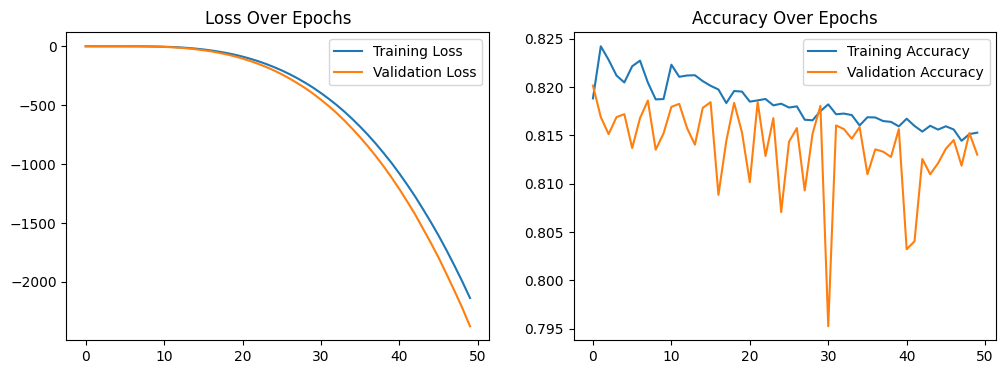

In [57]:
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.show()